# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [ ]:
# YOUR CODE HERE
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, header=None)

##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

In [ ]:
YouTubeVideo('SGvtwBsAuqw', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [ ]:
from numpy import NaN

# YOUR CODE HERE
raise NotImplementedError()

##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

In [ ]:
YouTubeVideo('FljpLkFU3KA', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [1]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [14]:
# YOUR CODE HERE
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, header=None)
                                     
    df_weather = df_weather.iloc[:,:4]

    df_out = df_weather\
        .rename(columns = {0:'station', 1:'datetime', 2:'obs_type', 3:'obs_value'})\
        .loc[df_weather[2] == 'TMAX']\
        .assign(obs_value = lambda df_weather: df_weather['obs_value']/10,\
            area = df_weather[0].str.extract('([a-zA-Z]+)', expand=True),\
            datetime_dt = pd.to_datetime(df_weather[1],format='%Y%m%d'))\
        .sort_values(by=['station','datetime'])\
        .reset_index(drop=True)

    df_out = df_out\
        .assign(obs_value_cat = pd.qcut(df_out['obs_value'],q=[0,0.1,0.9,1]),\
            obs_value_cat_labeled = pd.qcut(df_out['obs_value'],q=[0,0.1,0.9,1],labels=['cold','medium','hot']),\
            month =df_out['datetime_dt'].dt.month.map('{:02}'.format))\
        .set_index('datetime_dt')

    df_out['area'] = df_out['area'].astype('category')

    return df_out

# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets. If you want to know more then you can look up Chapter 8, section 8.2 in Python for Data Analysis, 2ed.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows. You can read more about these types of merges by visiting the Jake van der Plass [link](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html) or looking into PDA, section 8.2.

In [ ]:
YouTubeVideo('bGpYXW2D0Mk', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [31]:
# YOUR CODE HERE
start = 1870
end = 1876
weather_data = []
for i in range(start,end):
    w_df = load_weather(i)
    w_df['year'] = i
    weather_data.append(w_df)   

In [42]:

all_weather_data = pd.concat(weather_data)
all_weather_data

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month,year
datetime_dt,,,,,,,,,
1870-08-09,ASN00063004,18700809,TMAX,10.0,ASN,"(0.0, 28.9]",medium,08,1870
1870-08-10,ASN00063004,18700810,TMAX,8.9,ASN,"(0.0, 28.9]",medium,08,1870
1870-08-11,ASN00063004,18700811,TMAX,15.6,ASN,"(0.0, 28.9]",medium,08,1870
1870-08-12,ASN00063004,18700812,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870
1870-08-13,ASN00063004,18700813,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870
...,...,...,...,...,...,...,...,...,...
1875-12-27,USW00094728,18751227,TMAX,10.6,USW,"(-2.8, 27.8]",medium,12,1875
1875-12-28,USW00094728,18751228,TMAX,1.1,USW,"(-2.8, 27.8]",medium,12,1875
1875-12-29,USW00094728,18751229,TMAX,2.8,USW,"(-2.8, 27.8]",medium,12,1875


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas. If you want to know more then you can look up Chapter 10 in Python for Data Analysis, 2ed.

In [ ]:
YouTubeVideo('ZDgbVD5Y2us', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [55]:
# INCLUDED IN ASSIGNMENT 1

df_weather_data = all_weather_data.copy()

df_weather_data['tmax_mean'] = df_weather_data.groupby(by=['month','year','station'])['obs_value'].transform('mean')
df_weather_data['tmax_median'] = df_weather_data.groupby(by=['month','year','station'])['obs_value'].transform('median')
df_weather_data

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month,year,tmax_mean,tmax_median
datetime_dt,,,,,,,,,,,
1870-08-09,ASN00063004,18700809,TMAX,10.0,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6
1870-08-10,ASN00063004,18700810,TMAX,8.9,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6
1870-08-11,ASN00063004,18700811,TMAX,15.6,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6
1870-08-12,ASN00063004,18700812,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6
1870-08-13,ASN00063004,18700813,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6
...,...,...,...,...,...,...,...,...,...,...,...
1875-12-27,USW00094728,18751227,TMAX,10.6,USW,"(-2.8, 27.8]",medium,12,1875,3.890323,3.9
1875-12-28,USW00094728,18751228,TMAX,1.1,USW,"(-2.8, 27.8]",medium,12,1875,3.890323,3.9
1875-12-29,USW00094728,18751229,TMAX,2.8,USW,"(-2.8, 27.8]",medium,12,1875,3.890323,3.9


> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

In [96]:
station_data.groupby(by=['year','month'])['obs_value'].describe()


count       mean       std   min     25%    50%     75%   max
year month                                                               
1870 01      26.0  -0.426923  4.318940 -13.9  -1.100   0.00   1.700   7.2
     02      24.0  -1.175000  4.103895 -10.0  -3.300  -0.85   2.350   4.4
     03      26.0   2.250000  4.925383  -7.2  -1.100   2.50   5.600  12.8
     12      27.0   0.588889  3.932149  -8.3  -1.700   1.10   2.800   8.9
1871 01      26.0  -1.519231  6.354087 -13.9  -6.500  -1.40   3.025  12.8
     02      25.0  -0.668000  4.341344 -13.3  -2.200   0.00   1.700   8.3
     03      27.0   5.529630  3.263294  -0.6   3.050   5.00   8.050  12.2
     04      25.0  12.804000  5.161595   7.2   8.300  11.70  15.600  26.7
     05      27.0  21.900000  7.531830  10.0  15.000  22.80  28.900  32.8
     06      26.0  25.896154  5.149717  15.6  22.200  25.55  30.400  33.3
     07      26.0  27.500000  3.981357  20.6  24.550  27.80  31.100  33.9
     08      27.0  27.811111  3.611343  18.9  26.100  28.30  30.000  34.4
     09      26.0  20.938462  6.904843  10.0  14.325  22.20  26.100  33.9
     10      26.0  16.880769  5.478906   6.1  12.925  16.70  21.275  25.6
     11      26.0   3.842308  6.787351 -11.1   0.725   4.15   6.550  15.0
     12      26.0  -2.942308  5.017344 -11.7  -6.100  -1.70   0.000   7.2
1872 01      27.0  -0.722222  5.603113 -11.1  -5.550  -0.60   2.200  12.2
     02      25.0   1.908000  4.423227  -6.1  -1.100   3.90   4.400  11.1
     03      26.0  -1.000000  5.021474 -13.9  -2.650   0.60   2.075   6.1
     04      26.0  10.765385  6.498612  -1.1   6.100  10.60  16.275  23.9
     05      27.0  19.903704  5.456576   5.0  17.750  21.70  23.600  27.8
     06      25.0  27.112000  5.400719  15.6  25.000  27.80  31.100  35.0
     07      27.0  25.751852  4.217853  20.0  22.200  25.00  28.300  35.6
     08      27.0  26.618519  3.556039  16.1  24.700  27.20  29.400  31.7
     09      25.0  22.440000  4.968819  13.3  19.400  21.70  26.100  34.4
     10      27.0  14.385185  5.071163   3.9  10.600  15.60  17.500  23.3
     11      26.0   4.219231  4.572528  -5.0   1.100   5.60   7.800  12.8
     12      26.0  -4.419231  5.942391 -18.3  -7.800  -3.35  -0.150   3.9
1873 01      27.0  -3.662963  5.907176 -16.1  -8.600  -2.80   1.400   5.0
     02      24.0  -1.045833  5.549068 -11.1  -4.600  -0.85   3.450  10.0
     03      26.0   2.734615  4.399540 -11.1   1.250   3.05   5.450   9.4
     04      26.0   8.846154  4.292806   3.3   5.725   7.75  12.100  17.8
     05      27.0  18.874074  5.895800   7.8  15.300  18.90  23.050  30.6
     06      25.0  27.556000  3.947054  18.9  25.000  27.20  30.600  35.6
     07      27.0  26.018519  2.769898  16.7  25.600  26.70  27.500  31.1
     08      29.0  25.672414  3.070004  19.4  23.300  25.00  27.800  31.7
     09      30.0  20.626667  5.948453  11.1  15.150  20.55  24.275  31.1
     10      31.0  12.777419  5.755213   1.7   8.900  11.70  16.100  24.4
     11      30.0   1.266667  4.768310  -8.3  -1.925   1.10   3.900  12.8
     12      30.0   2.476667  4.230324  -8.3   0.725   2.25   3.900  12.2
1874 01      31.0  -1.164516  6.850185 -15.0  -6.700   1.10   2.200  15.0
     02      28.0  -1.653571  5.148857 -12.8  -5.000  -1.40   3.300   6.1
     03      31.0   2.183871  5.675391  -8.9  -1.400   2.80   5.850  13.9

<AxesSubplot:xlabel='year,month'>

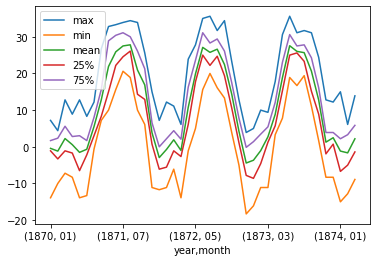

In [97]:
# INCLUDED IN ASSIGNMENT 1
station_data = df_weather_data.copy()
station_data = station_data[station_data['station'] == 'CA006110549']
station_data.groupby(by=['year','month'])['obs_value'].describe()[['max','min','mean','25%','75%']].plot()


> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [108]:
# INCLUDED IN ASSIGNMENT 1
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
data = pd.read_fwf(url,header=None)


In [106]:
data

,0,1,2,3,4,5,6,7
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0
...,...,...,...,...,...,...,...,...
118487,ZI000067969,21.0500,29.3670,861.0,WEST NICHOLSON,NaN,NaN,67969.0
118488,ZI000067975,20.0670,30.8670,1095.0,MASVINGO,NaN,NaN,67975.0
118489,ZI000067977,21.0170,31.5830,430.0,BUFFALO RANGE,NaN,NaN,67977.0
118490,ZI000067983,20.2000,32.6160,1132.0,CHIPINGE,NaN,GSN,67983.0


In [130]:

Station_name_df = data.assign(station = data.iloc[:,0],station_name = data.iloc[:,4])
Station_name_df = Station_name_df.iloc[:,8:]
Station_name_df

,station,station_name
0,ACW00011604,ST JOHNS COOLIDGE FLD
1,ACW00011647,ST JOHNS
2,AE000041196,SHARJAH INTER. AIRP
3,AEM00041194,DUBAI INTL
4,AEM00041217,ABU DHABI INTL
...,...,...
118487,ZI000067969,WEST NICHOLSON
118488,ZI000067975,MASVINGO
118489,ZI000067977,BUFFALO RANGE
118490,ZI000067983,CHIPINGE


##  Bonus Exercises

In [133]:
test1 = df_weather_data.copy()
test2 = Station_name_df.copy()

result = pd.merge(test1,test2,on='station')
result

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month,year,tmax_mean,tmax_median,station_name
0,ASN00063004,18700809,TMAX,10.0,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6,BATHURST GAOL
1,ASN00063004,18700810,TMAX,8.9,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6,BATHURST GAOL
2,ASN00063004,18700811,TMAX,15.6,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6,BATHURST GAOL
3,ASN00063004,18700812,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6,BATHURST GAOL
4,ASN00063004,18700813,TMAX,16.7,ASN,"(0.0, 28.9]",medium,08,1870,15.047826,15.6,BATHURST GAOL
...,...,...,...,...,...,...,...,...,...,...,...,...
138154,USC00064767,18751227,TMAX,10.6,USC,"(-2.8, 27.8]",medium,12,1875,2.087097,1.7,MIDDLETOWN 4 W
138155,USC00064767,18751228,TMAX,-2.5,USC,"(-2.8, 27.8]",medium,12,1875,2.087097,1.7,MIDDLETOWN 4 W
138156,USC00064767,18751229,TMAX,1.1,USC,"(-2.8, 27.8]",medium,12,1875,2.087097,1.7,MIDDLETOWN 4 W
138157,USC00064767,18751230,TMAX,2.5,USC,"(-2.8, 27.8]",medium,12,1875,2.087097,1.7,MIDDLETOWN 4 W


If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose. If you want to know more, then you can look up Chapter 8, section 8.3 in Python for Data Analysis, 2ed.

In [ ]:
YouTubeVideo('pOYQVpFCEu0', width=640, height=360)

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()